In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import datetime as dt
from tsfresh import extract_features
from utils import chart_ts
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Data processing

### Read data

In [45]:
df = pd.read_csv("all_coins_data.csv")
df.sort_values(["coin", "time"], inplace = True)
df = df[["time","daily_log_return", "coin"]]

In [46]:
df.head()

,time,daily_log_return,coin
0,2020-08-22,0.019340,ADA
1,2020-08-23,-0.030797,ADA
2,2020-08-24,0.017945,ADA
3,2020-08-25,-0.094018,ADA
4,2020-08-26,0.015859,ADA


### Extract features from Time series

In [47]:
extracted_features = extract_features(df, 
column_id="coin", column_sort="time")
extracted_features.head()

Feature Extraction:   0%|          | 0/9 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]


,daily_log_return__variance_larger_than_standard_deviation,daily_log_return__has_duplicate_max,daily_log_return__has_duplicate_min,daily_log_return__has_duplicate,daily_log_return__sum_values,daily_log_return__abs_energy,daily_log_return__mean_abs_change,daily_log_return__mean_change,daily_log_return__mean_second_derivative_central,daily_log_return__median,...,daily_log_return__fourier_entropy__bins_5,daily_log_return__fourier_entropy__bins_10,daily_log_return__fourier_entropy__bins_100,daily_log_return__permutation_entropy__dimension_3__tau_1,daily_log_return__permutation_entropy__dimension_4__tau_1,daily_log_return__permutation_entropy__dimension_5__tau_1,daily_log_return__permutation_entropy__dimension_6__tau_1,daily_log_return__permutation_entropy__dimension_7__tau_1,daily_log_return__query_similarity_count__query_None__threshold_0.0,daily_log_return__mean_n_absolute_max__number_of_maxima_7
ADA,0.0,0.0,0.0,0.0,2.216830,1.131009,0.070909,-0.000190,0.000022,0.007526,...,0.955957,1.633388,3.574407,1.790985,3.151103,4.535252,5.259698,5.457534,NaN,0.216455
ALGO,0.0,0.0,0.0,0.0,0.752552,1.224920,0.079294,-0.000398,-0.000120,-0.001203,...,0.952899,1.548577,3.587066,1.786798,3.128912,4.471307,5.238099,5.440205,NaN,0.211191
ATOM,0.0,0.0,0.0,1.0,1.253400,1.302531,0.081813,-0.000741,-0.000580,-0.000721,...,0.936648,1.578415,3.627268,1.786217,3.140701,4.483688,5.272612,5.443801,NaN,0.233921
BCH,0.0,0.0,0.0,0.0,1.062136,0.911587,0.062480,-0.000168,0.000021,0.004208,...,1.163243,1.742283,3.610647,1.779674,3.141727,4.571905,5.303545,5.440205,NaN,0.215149
BNB,0.0,0.0,0.0,1.0,3.146841,1.375397,0.071949,-0.000139,-0.000093,0.004555,...,1.136852,1.793575,3.788603,1.787480,3.137270,4.529736,5.296382,5.451758,NaN,0.275121


### Standard Scaling

In [48]:
extracted_features_cleaned=extracted_features
extracted_features_cleaned=extracted_features_cleaned.dropna(axis=1)
scaler = StandardScaler()
extracted_features_cleaned_std = scaler.fit_transform(extracted_features_cleaned)

### PCA

Text(0, 0.5, 'cumulative explained variance')

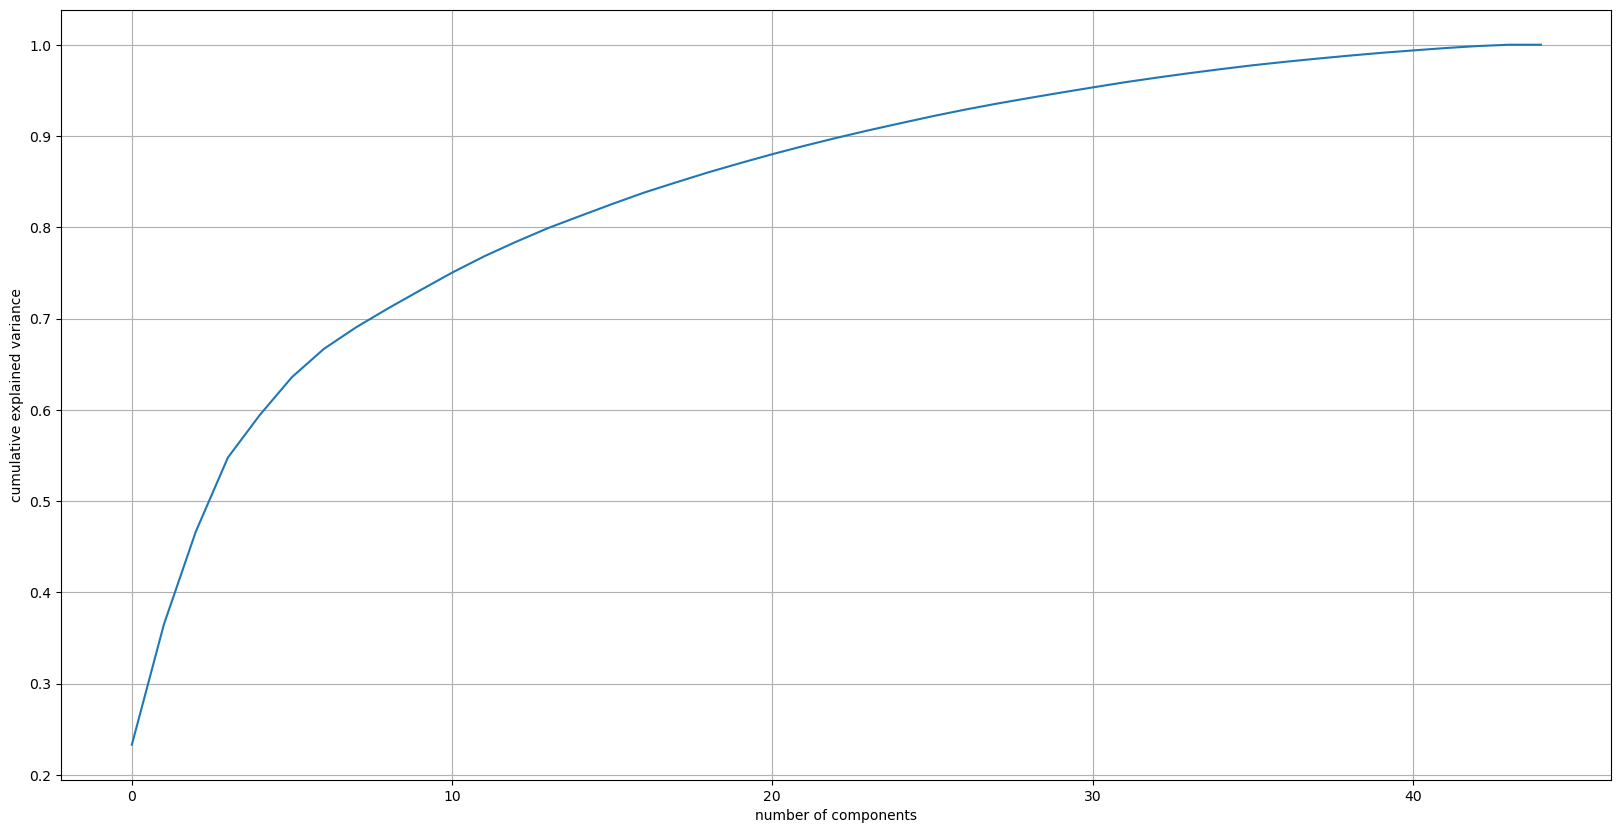

In [49]:
pca = PCA()
pca.fit(extracted_features_cleaned_std)
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23302005, 0.36479303, 0.46680223, 0.54773141, 0.59453815,
       0.63581638, 0.66682908, 0.69031984, 0.71109172, 0.73085507,
       0.75027495, 0.76813514, 0.78412056, 0.79914677, 0.81240282,
       0.82547984, 0.83803118, 0.84922871, 0.86017027, 0.87030442,
       0.8800752 , 0.88923269, 0.89793056, 0.90618708, 0.91398303,
       0.92162683, 0.92877868, 0.93539269, 0.94151683, 0.94745597,
       0.95320901, 0.95882934, 0.96391935, 0.9687387 , 0.97323004,
       0.97748344, 0.98122376, 0.98470338, 0.98799949, 0.99104939,
       0.99372666, 0.99630974, 0.99849599, 1.        , 1.        ])

### Knee calculation

In [51]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, 46), y = np.cumsum(pca.explained_variance_ratio_), curve="concave", direction = "increasing", online = True)
print(kneedle.knee)

12


In [52]:
pca = PCA(n_components=12)
scores_pca  = pca.fit_transform(extracted_features_cleaned_std)

### K-Means Clustering

/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Text(0, 0.5, 'WCSSS')

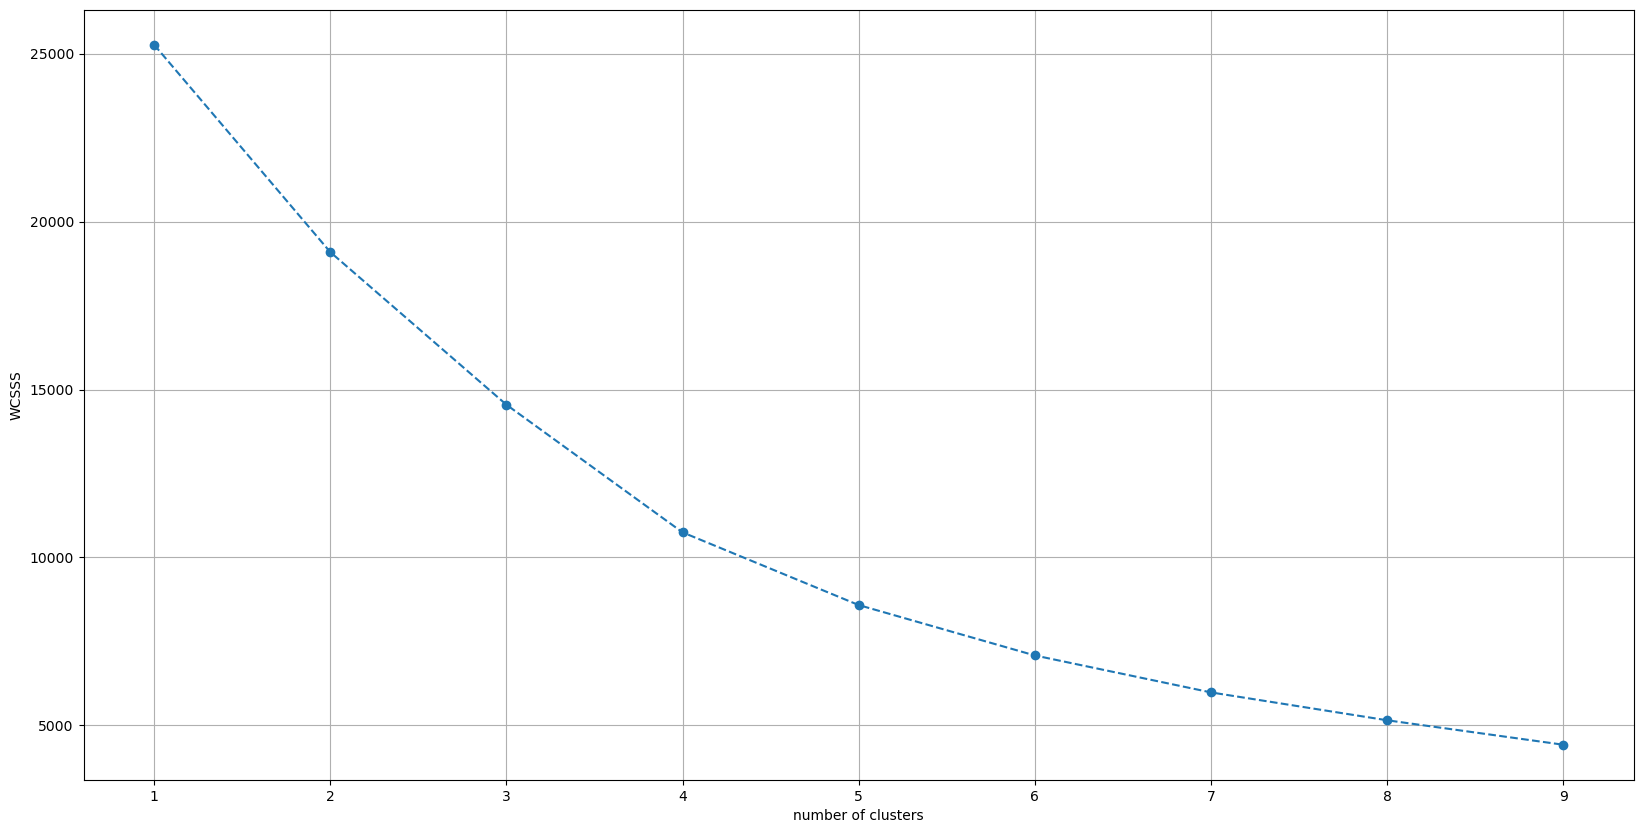

In [53]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i) 
    km.fit(scores_pca)
    wcss.append(km.inertia_)
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('WCSSS')

In [54]:
kneedle = KneeLocator(x = range(1, 10), y = wcss, curve="convex", direction = "decreasing", online = True)
print(kneedle.knee)

4


### K-means cluster selection

In [55]:
N_CLUSTERS = kneedle.knee

km = KMeans(
    n_clusters=N_CLUSTERS
)
pca_km = km.fit_predict(scores_pca)
np.unique(pca_km,return_counts=True)

/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2, 3], dtype=int32), array([37,  1,  6,  1]))

### Silhouette Score

In [56]:
silhouette_score(scores_pca, pca_km, metric="euclidean")

0.36001131824970406